In [1]:
from zipfile import ZipFile
with ZipFile('reviews.zip') as zp:
    zp.extractall()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [3]:
data = pd.read_csv('Musical_instruments_reviews.csv')

In [4]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
data = data[['reviewText','summary','overall']]

In [6]:
data['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [7]:
data['overall'] = data['overall'].map(lambda x : 'positive' if x>=4.0 else 'negative')

In [8]:
data.head()

,reviewText,summary,overall
0,"Not much to write about here, but it does exac...",good,positive
1,The product does exactly as it should and is q...,Jake,positive
2,The primary job of this device is to block the...,It Does The Job Well,positive
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,positive
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,positive


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  10254 non-null  object
 1   summary     10261 non-null  object
 2   overall     10261 non-null  object
dtypes: object(3)
memory usage: 240.6+ KB


In [10]:
data.isnull().sum()

reviewText    7
summary       0
overall       0
dtype: int64

In [11]:
data.dropna(axis=0, inplace = True)

In [12]:
data.describe()

,reviewText,summary,overall
count,10254,10254,10254
unique,10254,8846,2
top,"Not much to write about here, but it does exac...",Great,positive
freq,1,42,9015


In [13]:
posi = data[data['overall'] == 'positive']

In [14]:
neg = data[data['overall'] == 'negative']

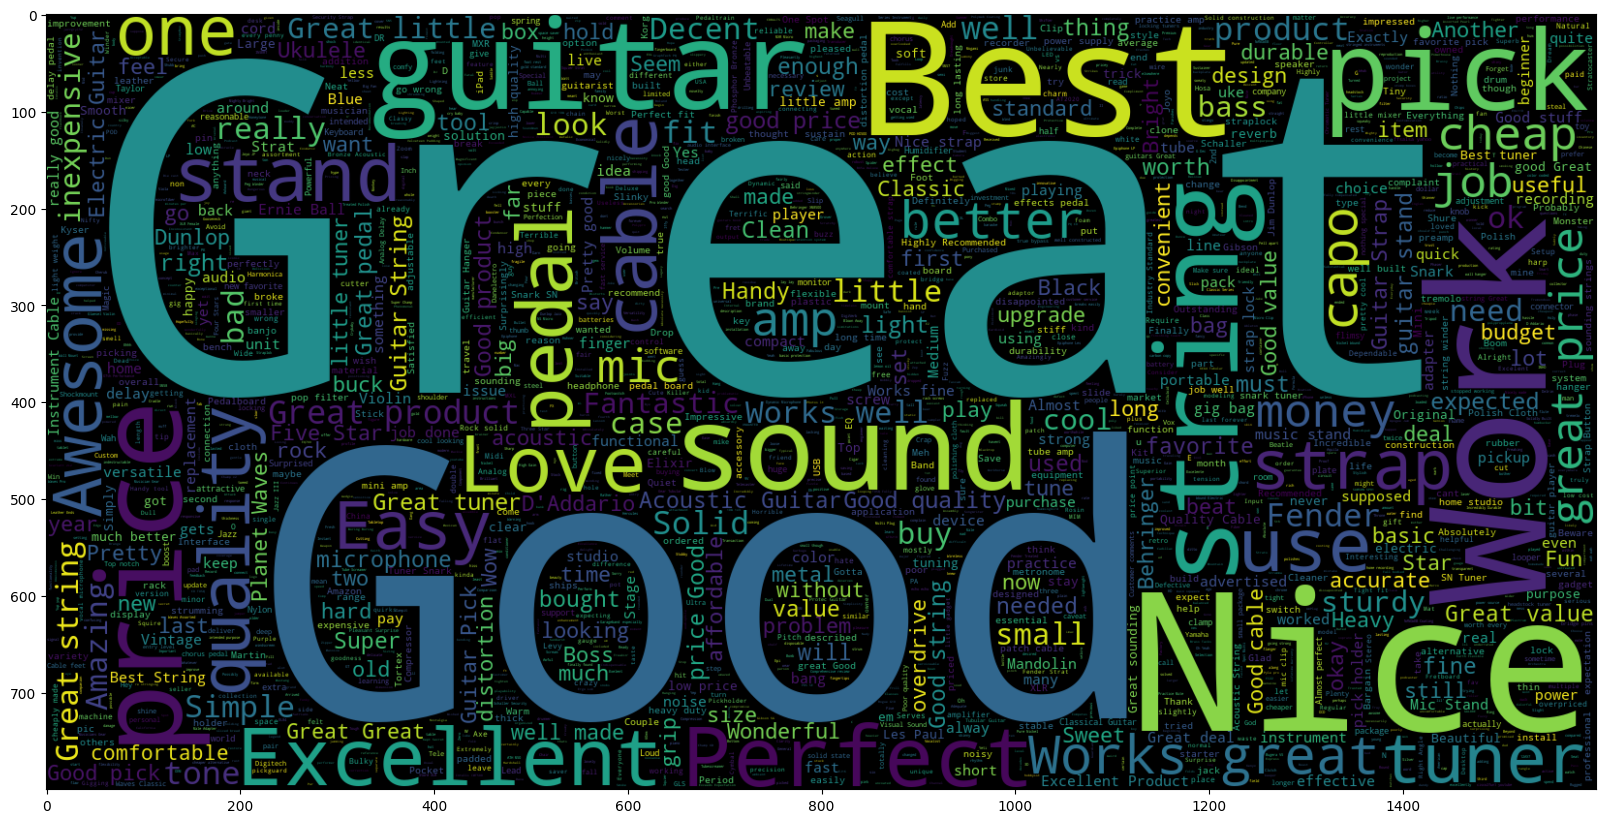

In [15]:
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height= 800).generate(" ".join(data['summary']))
plt.imshow(wc, interpolation='bilinear')

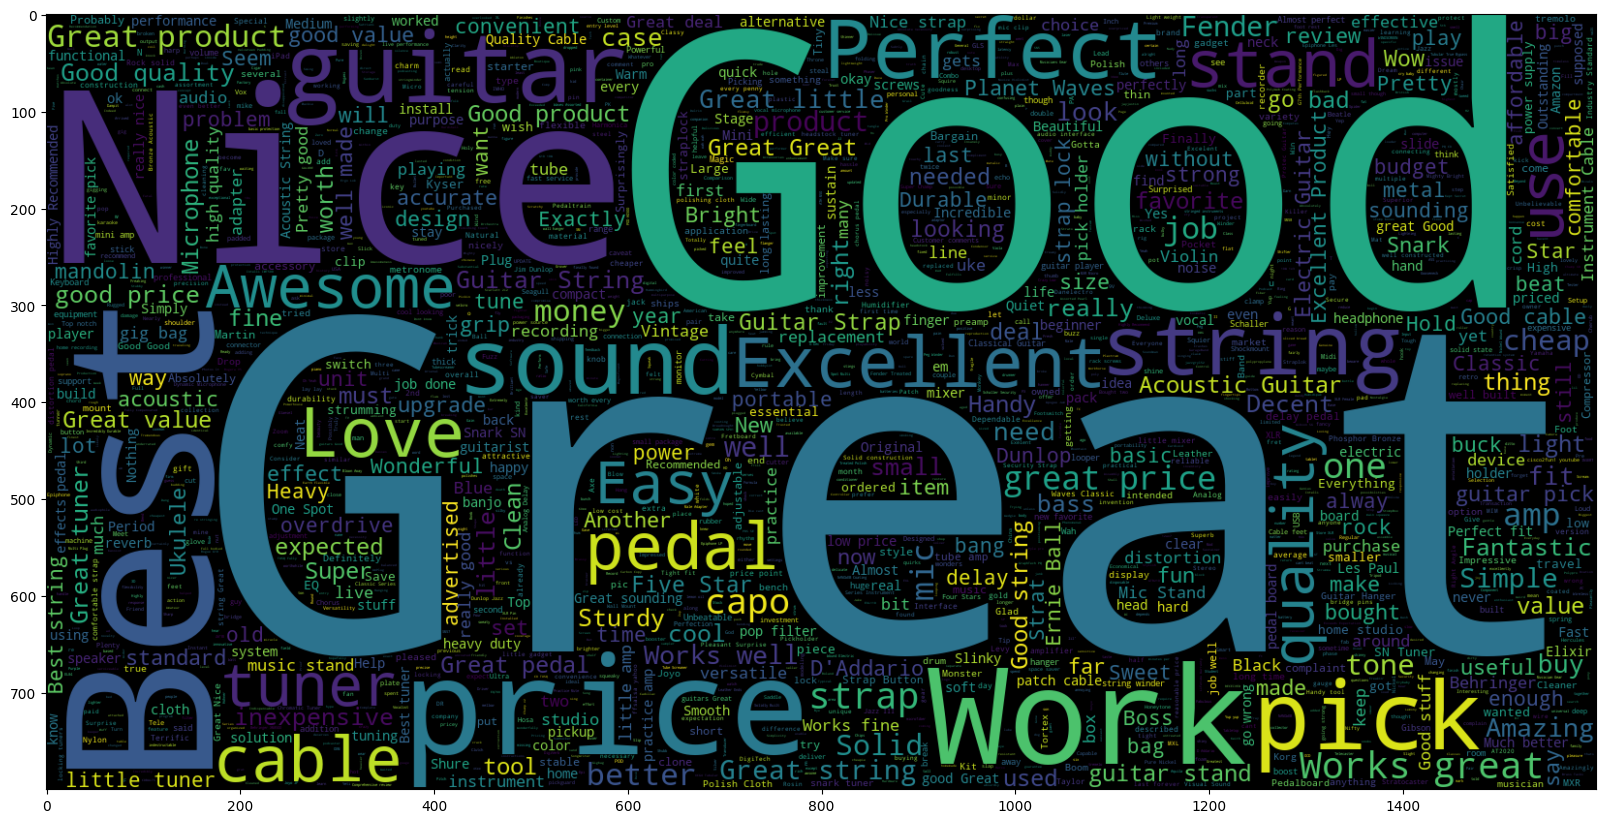

In [16]:
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height= 800).generate(" ".join(posi['summary']))
plt.imshow(wc, interpolation='bilinear')

In [17]:
data['reviewText' ] = data['reviewText'] + ' ' + data['summary']

In [18]:
data.drop(['summary'], axis = 1, inplace = True)

In [19]:
data.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",positive
1,The product does exactly as it should and is q...,positive
2,The primary job of this device is to block the...,positive
3,Nice windscreen protects my MXL mic and preven...,positive
4,This pop filter is great. It looks and perform...,positive


In [20]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [21]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(), get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [24]:
lemmatize_words(data.loc[10]['reviewText'])

"monster make wide array cables, include high end. initially purchase pair ofmonster rock instrument cable 21 feet angled straight 1/4-inch plugto use keyboards, come time purchase cable bass guitar thought i'd pinch pennies. glad did.i compare cable model expensive model previously purchase and, aside looks, could detect difference sound. swapped back forth guitar keyboards, ensure model use instrument still difference.what expensive model go looks. sure (the high price model) even sturdy mold stress relief end model seem make reliable pricier sibling.bottom line: carefully compare cable use instrument amp possible make purchase decision. may find, did, high price necessarily equal high value, even manufacturer. one best instrument cable within brand"

In [25]:
data['reviewText'] = data['reviewText'].map(lemmatize_words)

In [26]:
data['overall'] = data['overall'].map({'positive':1, 'negative':0})

In [27]:
x = data[['reviewText']]
y = data['overall']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df = 0 , max_df=1, binary = False, ngram_range=(1,3))
x_tf = tf.fit_transform(x['reviewText'])

In [29]:
x_tf.shape

(10254, 697364)

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42, sampling_strategy = 1)
x_sm, y_sm = smote.fit_resample(x_tf,y)
y_sm.value_counts()

1    9015
0    9015
Name: overall, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size = 0.2,random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [33]:
prediction = mnb.predict(x_test)
prediction

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)*100

99.63948973932335

In [36]:
text = input("Enter your review: ")
text = lemmatize_words(text)
array = tf.transform([text])
if mnb.predict(array)[0] == 1:
    print("positive")
else:
    print("negative")

Enter your review: monster make wide array cables, include high end. initially purchase pair ofmonster rock instrument cable 21 feet angled straight 1/4-inch plugto use keyboards, come time purchase cable bass guitar thought i'd pinch pennies. glad did.i compare cable model expensive model previously purchase and, aside looks, could detect difference sound. swapped back forth guitar keyboards, ensure model use instrument still difference.what expensive model go looks. sure (the high price model) even sturdy mold stress relief end model seem make reliable pricier sibling.bottom line: carefully compare cable use instrument amp possible make purchase decision. may find, did, high price necessarily equal high value, even manufacturer. one best instrument cable within brand
positive
